In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rockpaperscissors/README_rpc-cv-images.txt
/kaggle/input/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt
/kaggle/input/rockpaperscissors/rps-cv-images/paper/kVKp9kJji4urjoMs.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/JUn3VuVCoOKC5Nv2.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/JlMP0YH6vhxWRMZz.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/y2auZRkrUIi0wvd2.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/Qx31hf6YWyFs6Mu7.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/2tDgPZGqbrw95j39.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/v1b7FBFD4ZbLJnhB.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/B3dlyiRDulDJWOsW.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/Ht08RX3DQCSdl9Sy.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/vHbB53ZFtZoNcvAM.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/n5NXfZTRonR4iOr0.png
/kaggle/input/rockpaperscissors/rps-cv-images/paper/9v75qnx8zdeAAOq6.

/kaggle/input/rockpaperscissors/rps-cv-images/rock/KQqIoVT62pLqhEGR.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/qUjyvBdP04lUmBkl.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/Mfz7ZRZdZeRxFYAf.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/4iN0sQcmcukBN652.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/2MKZD0VUw7Tez2Jx.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/xMzUrLkx9vIWWwZU.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/Bm9hYmhGUGmKxDwK.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/IRSnSZdAUmx8ZVkD.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/UOBPeuMnZRb6Ycug.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/pI8SGhRU1bmqZAcM.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/L1nqVqYSFwToHPKG.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/ADOiIs56eyYsunID.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/Tz2CIaI6bZXdon61.png
/kaggle/input/rockpaperscissors/rps-cv-images/rock/oO3NO14nRLCUN

/kaggle/input/rockpaperscissors/rock/dZ6rscIYTbmlwVZE.png
/kaggle/input/rockpaperscissors/rock/wnFnnnpg4cx8NeoO.png
/kaggle/input/rockpaperscissors/rock/82wZr9Bpl9vfsoG1.png
/kaggle/input/rockpaperscissors/rock/SE5eUJl8euX8gTJ3.png
/kaggle/input/rockpaperscissors/rock/NuJjhPSItSWUuMOk.png
/kaggle/input/rockpaperscissors/rock/Yzx0RwB2AFNAvC6s.png
/kaggle/input/rockpaperscissors/rock/clIAiFiURAZ36c8y.png
/kaggle/input/rockpaperscissors/rock/r87DASz5okmR0fnI.png
/kaggle/input/rockpaperscissors/rock/pYbu2Q82tjh9AGkt.png
/kaggle/input/rockpaperscissors/rock/BMet9oI6hmx1zdc9.png
/kaggle/input/rockpaperscissors/rock/j31qLVBZfstRnWsA.png
/kaggle/input/rockpaperscissors/rock/9txR3KPmEGdjo4A6.png
/kaggle/input/rockpaperscissors/rock/ZWrzVOGgkuKQRDnQ.png
/kaggle/input/rockpaperscissors/rock/IR0TvCNLcK7IrE1a.png
/kaggle/input/rockpaperscissors/rock/zZRojXITRo7bAIRT.png
/kaggle/input/rockpaperscissors/rock/g04l14MAwqQthuWW.png
/kaggle/input/rockpaperscissors/rock/O3ko4JxjCkdULELr.png
/kaggle/input/

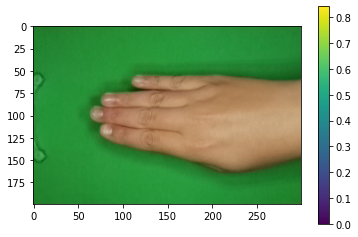

(200, 300, 3)

In [8]:
img_path = "/kaggle/input/rockpaperscissors/rps-cv-images/paper/kVKp9kJji4urjoMs.png"
img = mpimg.imread(img_path)
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()
img.shape

In [15]:
data_dir = "/kaggle/input/rockpaperscissors/rps-cv-images/"

batch_size = 32
img_height = 200
img_width = 300

print("Train:")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print("Validation:")
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Train:
Found 2188 files belonging to 3 classes.
Using 1751 files for training.
Validation:
Found 2188 files belonging to 3 classes.
Using 437 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['paper', 'rock', 'scissors']


In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)